## Description of data set

In [72]:
#Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

#To display multiple output from a cell, not just last output
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

#To skip those warnings and stuff
import warnings
warnings.filterwarnings("ignore")

#Importing the data set
data = pd.read_csv("Salary_Data.csv")

## EDA
Exploratory Data Analysis (EDA) is an essential step in the data analysis process. It involves investigating and summarizing the main characteristics, patterns, and relationships within a dataset using visual and statistical methods. EDA helps in understanding the data, identifying outliers, missing values, and data distribution.

# Part 1: Non-graphical analysis


In [166]:
#Looking at the data
data.head(5)  # 1 data from top of red wine data
data.shape

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


(6698, 6)

In [73]:
print("There are ",data.isnull().values.sum(), "missing values", "in the dataset.") #Just show how many
if data.isnull().values.sum() != 0:
    data = data.dropna()
    print("After removal of rows with missing data, Missing values = ",data.isnull().values.sum(),".") #counting number of NaNs in the dataset


There are  17 missing values in the dataset.
After removal of rows with missing data, Missing values =  0 .


In [74]:
# Understanding the data set
print("SALARY PREDICTION DATASET \n");
print("Shape of data: ")
data.shape
print("Description of data: ")
data.describe().loc[['mean','std','min','max']] #You can use data.info() for information
data.info()

SALARY PREDICTION DATASET 

Shape of data: 


(6698, 6)

Description of data: 


,Age,Years of Experience,Salary
mean,33.623022,8.095178,115329.253061
std,7.615784,6.060291,52789.792507
min,21.000000,0.000000,350.000000
max,62.000000,34.000000,250000.000000


<class 'pandas.core.frame.DataFrame'>
Int64Index: 6698 entries, 0 to 6703
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6698 non-null   float64
 1   Gender               6698 non-null   object 
 2   Education Level      6698 non-null   object 
 3   Job Title            6698 non-null   object 
 4   Years of Experience  6698 non-null   float64
 5   Salary               6698 non-null   float64
dtypes: float64(3), object(3)
memory usage: 366.3+ KB


In [59]:
#Column Names
data.keys()

Index(['Age', 'Gender', 'Education Level', 'Job Title', 'Years of Experience',
       'Salary'],
      dtype='object')

### Description of data after Non-grpahical analysis of dataset

* Dataset contained 6704 records with 6 features
* Size of dataset file(.csv) was 366.3 KB which made it easier to process on local machine
* The data contained 17 missing values. We removed rows with missing values which changed the shape of dataset to 6698 records with 6 features.

Now we will create a copy of data to avoid mistakenly modifying it.

In [78]:
# Creating copy of dataframe
data_copy = data.copy()

# Defining custom hex colors for charts
custom_colors_gender = ['#2085EC', '#CEA9BC']

## Part 2: Graphical Analysis

([<matplotlib.patches.Wedge at 0x230ca020d60>,
 [Text(-0.1655011948334499, 1.0874784386408314, 'Male'),
  Text(0.1583568390734671, -1.0885417362318546, 'Female'),
  Text(1.09997628571755, -0.007222939777047206, 'Other')],
 [Text(-0.09027337900006359, 0.5931700574404535, '54.8%'),
  Text(0.08637645767643658, -0.5937500379446479, '45.0%'),
  Text(0.5999870649368454, -0.003939785332934839, '0.2%')])

Text(0.5, 1.0, 'Demography of dataset: ')

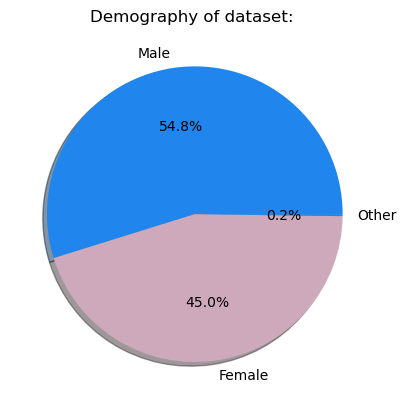

In [79]:
# Creating a pie chart to understand the demographics of data

result_counts = data_copy['Gender'].value_counts()
plt.pie(result_counts, labels = result_counts.index, autopct = '%1.1f%%', colors = custom_colors_gender, shadow = True)
plt.title('Demography of dataset: ')
plt.show()

In [81]:
# We will be removing 'Other' gender to make the data easier to work with

data_copy = data_copy[data_copy['Gender'] != 'Other']

([<matplotlib.patches.Wedge at 0x230cbed4a00>,
 [Text(-0.16942210391298648, 1.0868744870985323, 'Male'),
  Text(0.16942220567351934, -1.0868744712360852, 'Female')],
 [Text(-0.0924120566798108, 0.5928406293264721, '54.9%'),
  Text(0.092412112185556, -0.5928406206742283, '45.1%')])

<Axes: xlabel='Gender', ylabel='count'>

Text(0.5, 0.98, 'Demography of dataset: ')

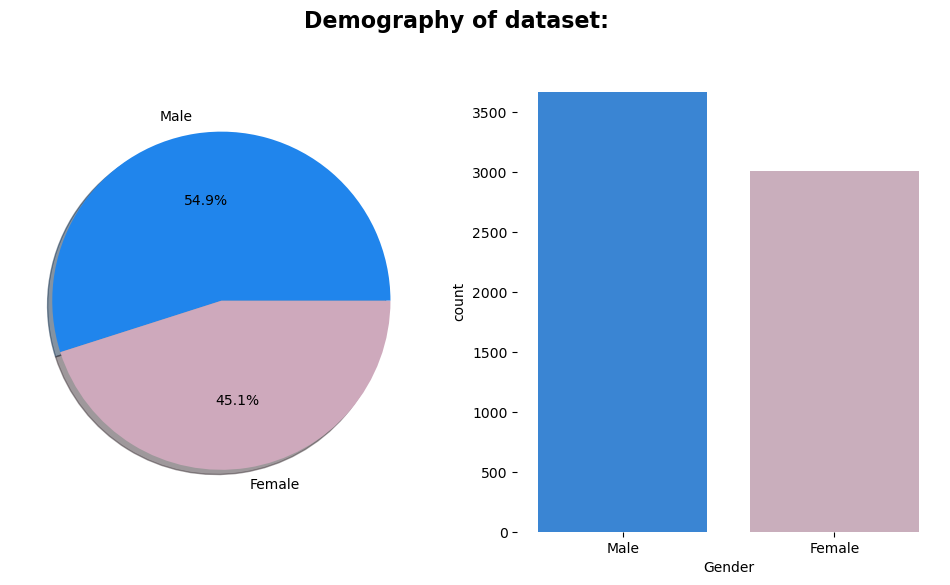

In [101]:
# Creating a pie chart and bar grpah to understand the demographics of data

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

result_counts = data_copy['Gender'].value_counts()
axes[0].pie(result_counts, labels = result_counts.index, autopct = '%1.1f%%', colors = custom_colors_gender, shadow = True)

sns.countplot(data=data_copy, x='Gender', palette = custom_colors_gender)
sns.despine(left = True, bottom = True)

plt.suptitle('Demography of dataset: ', fontsize=16, fontweight='bold')
plt.show()

In [125]:
mean = np.mean(data_copy['Salary'])

# Count of data points greater than the mean
count_greater = np.sum(data_copy['Salary'] > mean)

# Count of data points less than the mean
count_less = np.sum(data_copy['Salary'] < mean)

print(f"There are {count_greater} people having salary more than mean({mean:.0f}) and {count_less} people with salary less than mean.")

There are 3307 people having salary more than mean(115307) and 3377 people with salary less than mean.


So the data is almost balanced. We can use this dataframe as the basis of our predictive model without much 'bias'.

Text(0.0, 107888.99867241952, '107889.00')

[Text(0, 0, 'Male'), Text(1, 0, 'Female')]

Text(1.0, 121395.69763007356, '121395.70')

[Text(0, 0, 'Male'), Text(1, 0, 'Female')]

Text(0.5, 1.0, 'Mean Salary by Gender | Which gender has more mean salary?')

Text(0.5, 0, 'Gender')

Text(0, 0.5, 'Mean Salary')

<Figure size 800x600 with 0 Axes>

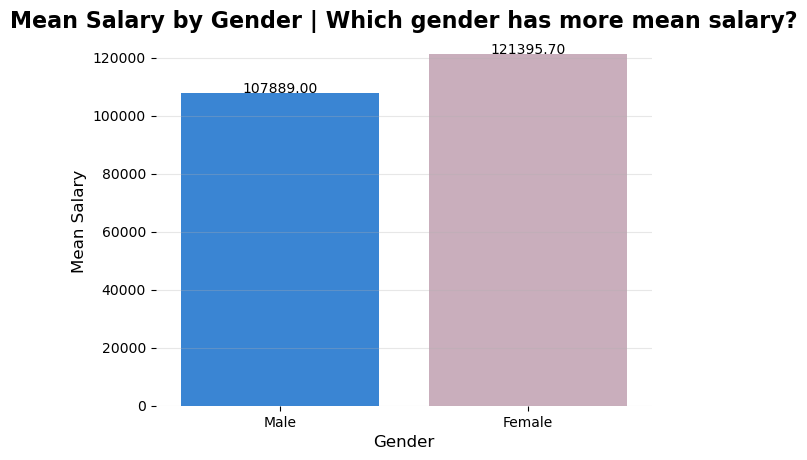

<Figure size 800x600 with 0 Axes>

In [131]:
salary_mean = data_copy.groupby('Gender')['Salary'].mean().reset_index()


# Create the bar plot
ax = sns.barplot(x='Gender', y='Salary', data=salary_mean, palette=custom_colors_gender)

# Add labels to the bars
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2, p.get_height(), '{:.2f}'.format(p.get_height()), ha='center')
    ax.set_xticklabels(['Male', 'Female'])
    
# Add plot titles and labels
plt.title('Mean Salary by Gender | Which gender has more mean salary?', fontsize=16, fontweight='bold')
plt.xlabel('Gender' , fontsize=12)
plt.ylabel('Mean Salary' , fontsize=12)

# Remove spines
sns.despine(left=True, bottom=True)

# Remove vertical lines from the grid
plt.grid(axis='y', alpha=0.3)
plt.gca().xaxis.grid(False)

plt.figure(figsize=(8, 6))
# Show the plot
plt.show()


In [133]:
anemia_rates = data_copy.groupby('Gender')['Salary'].mean().round(2)
anemia_rates

Gender
Female    107889.0
Male      121395.7
Name: Salary, dtype: float64

This shows that on average, females have more salary than males.
It is worth noting however that female population is less than that of male in our dataset.

### Experience and Salary

(array([1881., 1359., 1347.,  823.,  622.,  414.,  126.,   61.,   30.,
          21.]),
 array([ 0. ,  3.4,  6.8, 10.2, 13.6, 17. , 20.4, 23.8, 27.2, 30.6, 34. ]),
 <BarContainer object of 10 artists>)

Text(0.5, 0, 'Years of Experience')

Text(0, 0.5, 'Frequency')

Text(0.5, 1.0, 'Histogram of Job Experience')

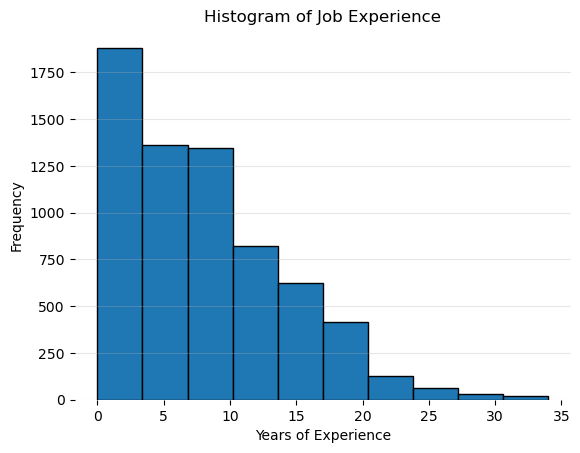

In [136]:
# Plotting histogram
plt.hist(data_copy['Years of Experience'], bins=10, edgecolor='black')

# Adding labels and title
plt.xlabel('Years of Experience')
plt.ylabel('Number of people')
plt.title('Histogram of Job Experience')

# Remove spines
sns.despine(left=True, bottom=True)

# Remove vertical lines from the grid
plt.grid(axis='y', alpha=0.3)
plt.gca().xaxis.grid(False)

# Displaying the histogram
plt.show()

### It should be noted that most of the people are inexperienced in the data set.

<Axes: xlabel='Years of Experience', ylabel='Salary'>

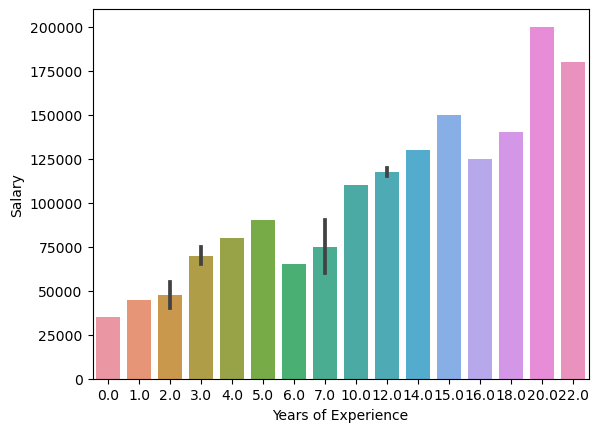

In [155]:
sns.barplot(data_copy.head(20), x='Years of Experience', y='Salary')
# Visualization of some data

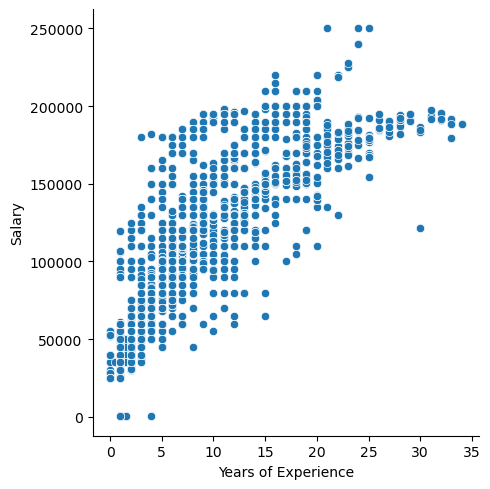

In [158]:
sns.relplot(data_copy, x='Years of Experience', y='Salary')

In [144]:
from scipy.stats import skew

# Calculate skewness using skew() function from scipy.stats
skewness = skew(data_copy['Years of Experience'])

print("Skewness:", skewness)

Skewness: 0.9654929590194796


#### This shows that the data is right skewed a lot.

In [ ]:
# from wordcloud import WordCloud

# # Extract the "Years of Experience" column
# experience = data_copy['Education Level']

# # Convert the column values to a single string
# experience_text = ' '.join(experience.astype(str))

# # Create a WordCloud object and generate the word cloud
# wordcloud = WordCloud().generate(experience_text)

# # Display the word cloud
# plt.imshow(wordcloud, interpolation='bilinear')
# plt.axis('off')
# plt.show()

<Figure size 1000x800 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Correlation Heatmap')

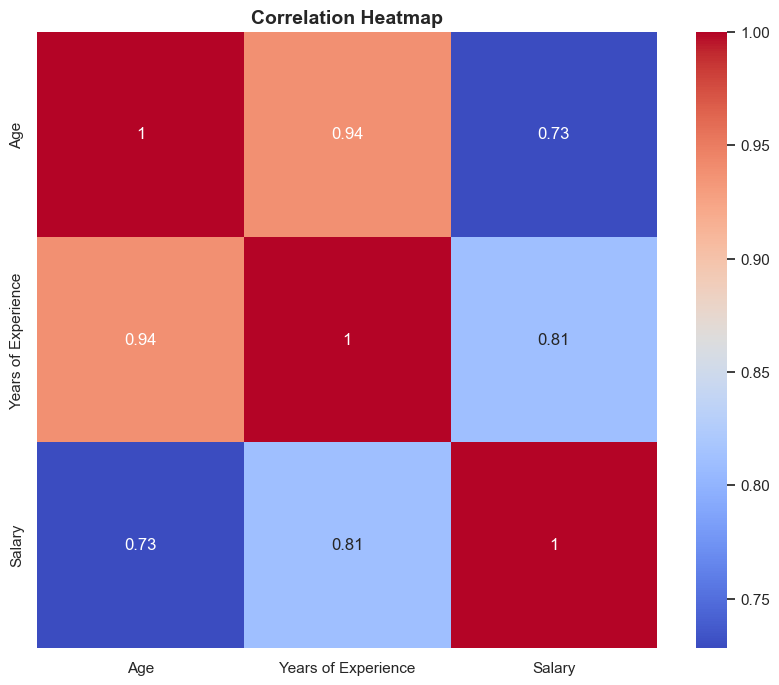

In [171]:
# Compute the correlation matrix
correlation_matrix = data_copy.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

# Set plot title
plt.title('Correlation Heatmap', fontsize=14, fontweight='bold')

# Show the plot
plt.show()


### Performing data cleaning.

In [174]:
unique_values = data_copy['Education Level'].unique()
print(unique_values)

["Bachelor's" "Master's" 'PhD' "Bachelor's Degree" "Master's Degree"
 'High School' 'phD']


In [177]:
data_copy['Education Level'] = data_copy['Education Level'].replace({"Bachelor's Degree": "Bachelor's"})
data_copy['Education Level'] = data_copy['Education Level'].replace({"Master's Degree": "Master's"})
data_copy['Education Level'] = data_copy['Education Level'].replace({"phD":"PhD"})


In [178]:
unique_values = data_copy['Education Level'].unique()
print(unique_values)

["Bachelor's" "Master's" 'PhD' 'High School']


In [187]:
data_copy2 = data_copy.copy()
replacement_mapping = {"High School": 12, "Bachelor's": 16, "Master's": 18, "PhD": 20}
data_copy2['Education Level'] = data_copy2['Education Level'].replace(replacement_mapping)
data_copy2.rename(columns={'Education Level': 'Years of Study'}, inplace=True)

In [188]:
unique_values = data_copy2['Years of Study'].unique()
print(unique_values)

[16 18 20 12]


<Figure size 1000x800 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Correlation Heatmap')

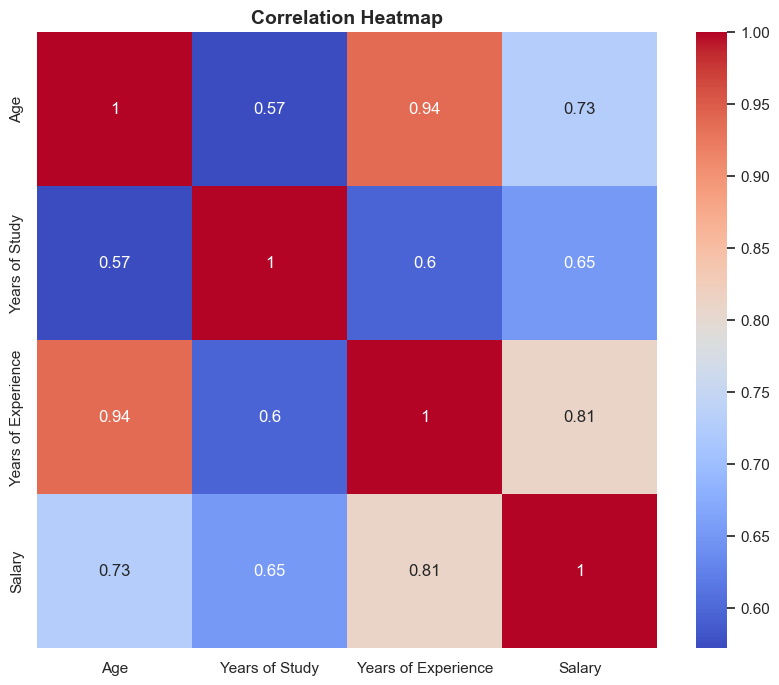

In [191]:
# Compute the correlation matrix
correlation_matrix = data_copy2.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

# Set plot title
plt.title('Correlation Heatmap', fontsize=14, fontweight='bold')

# Show the plot
plt.show()


<Axes: xlabel='Years of Experience', ylabel='Salary'>

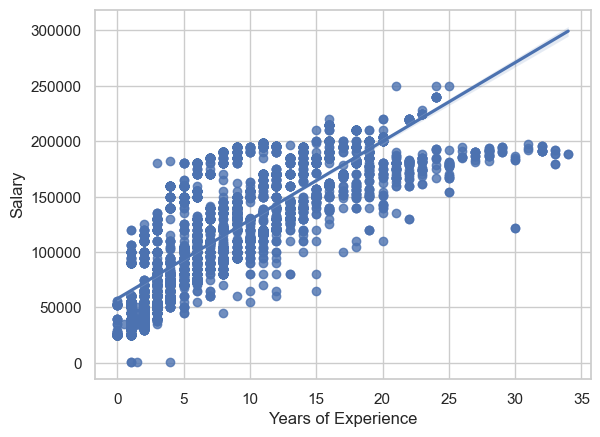

In [196]:
sns.regplot(data_copy2, x='Years of Experience', y='Salary')

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='Years of Study', ylabel='Salary'>

Text(0.5, 1.0, 'Distribution of Salary by Years of Study and Gender')

Text(0.5, 0, 'Years of Study')

Text(0, 0.5, 'Salary')

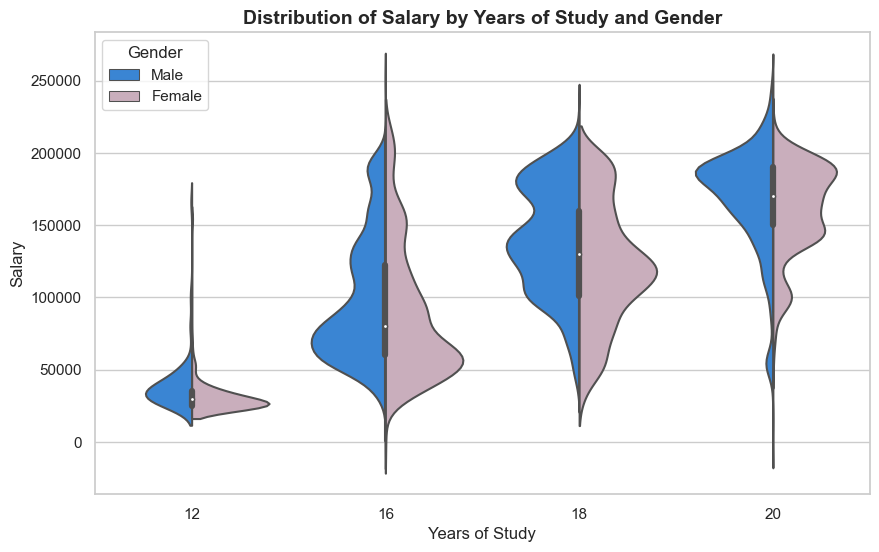

In [195]:
data_copy = data.copy()

# Set the plot style
sns.set(style="whitegrid")

# Create the violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(x="Years of Study", y="Salary", hue="Gender", data=data_copy2, palette=custom_colors_gender, split=True)

# Set plot title and axis labels
plt.title("Distribution of Salary by Years of Study and Gender", fontsize=14, fontweight="bold")
plt.xlabel("Years of Study", fontsize=12)
plt.ylabel("Salary", fontsize=12)

# Show the plot
plt.show()

In [218]:
data_copy2['Gender'] = data_copy2['Gender'].replace({'Male': 1, 'Female': 0})
# Changing categorical data Gender to numerical

#### Summary after data cleaning and EDA:
Education level was available as categorical data. Also, the data in that column had same data in different form.
i.e. Bachelor's Degree was entered as Bachelor's and Bachelor's Degree.

Now, categorical data "Education level" was changed to "Years of Study" which made analysis easier.
We were then able to incorporate Years of Study in heatmap as well as salary.

From the above analysis, we are able to see that salary is correlated with years of study, gender as well as years of experience.
We justify this further with feature selection.

# Feature Selection

To validate the outcome of the correlation matrix, statistical method known as univariate selection using the SelectKBest method was used to select the top 3 features. SelectKBest uses Chi-squared as scoring functions i.e., tests whether the occurrences of a specific feature and a specific class are independent using their frequency distribution.

When we analyze the relationship between one feature and the target variable, we ignore the other features. That is why it is called ‘univariate Each feature has its test score. Finally, all the test scores are compared, and the features with top scores will be selected.

#### SelectKBest for feature selection and ranking.
For decreasing complexity of this study, we shall shift our focus away from Job Title which requires one-hot encoding.
Also, we shall ignore the Age column since Years of Experience incorporates age too.

In [229]:
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

X = data_copy2.drop(['Salary', 'Job Title','Age'], axis=1)  # independent columns excluding 'Salary' and 'Job Title'
y = data_copy2['Salary']

k_values = ['all']  # different values of K to try
best_k = 0  # variable to keep track of the best K value
best_score = 0  # variable to keep track of the best score

for k in k_values:
    # Apply SelectKBest class to extract the top k best features
    best_features = SelectKBest(score_func=chi2, k=k)
    fit = best_features.fit(X, y)

    dfscores = pd.DataFrame(fit.scores_)  # score for each feature
    dfcolumns = pd.DataFrame(X.columns)

    # Concatenate two dataframes for better visualization
    feature_scores = pd.concat([dfcolumns, dfscores], axis=1)
    feature_scores.columns = ['Feature', 'Score']  # naming the dataframe columns

    # Get the best K value based on the score
    if feature_scores['Score'].sum() > best_score:
        best_score = feature_scores['Score'].sum()
        best_k = k

print(f"The best value of K is {best_k} with a score of {best_score}.")

print("---")
print(feature_scores)
print("---")
print(feature_scores.nlargest(3, 'Score'))  # print the 3 best features


The best value of K is all with a score of 26247.197330767463.
---
               Feature         Score
0               Gender    696.306272
1       Years of Study   1045.073037
2  Years of Experience  24505.818021
---
               Feature         Score
2  Years of Experience  24505.818021
1       Years of Study   1045.073037
0               Gender    696.306272


This shows that Years of Experience matters the most, followed by Years of Study and then only gender.

# Machine Learning:

### Part 1: Splitting data into Training and Testing samples

We don't use the full data for creating the model. Some data is randomly selected and kept aside for checking how good the model is. This is known as Testing Data and the remaining data is called Training data on which the model is built. Typically 70% of data is used as training data and the rest 30% is used as testing data.

In [230]:
data_copy2.columns

Index(['Age', 'Gender', 'Years of Study', 'Job Title', 'Years of Experience',
       'Salary'],
      dtype='object')

In [234]:
X = data_copy2.drop(['Age', 'Job Title', 'Salary'], axis=1, inplace=False)
y = data_copy2['Salary']

In [235]:
X

,Gender,Years of Study,Years of Experience
0,1,16,5.0
1,0,18,3.0
2,1,20,15.0
3,0,16,7.0
4,1,18,20.0
...,...,...,...
6699,0,20,20.0
6700,1,12,3.0
6701,0,16,4.0
6702,1,18,14.0


In [237]:
from sklearn.model_selection import train_test_split
# Split the data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, shuffle=True, random_state=101)

In [239]:
# Checking size of split
print("X_train - ",X_train.shape)
print("y_train - ",y_train.shape)
print("X_test - ",X_test.shape)
print("y_test - ",y_test.shape)

X_train -  (4678, 3)
y_train -  (4678,)
X_test -  (2006, 3)
y_test -  (2006,)


### Part 2: Using machine learning model

Our problem is regression problems since we don't have a binary result or just a fixed number of possible results.(Like Disease detection, win/loss prediction etc). Our result is salary which is a continuous value, which means we can predict the salary to a degree of accuracy but it will most likely not be exact value.

We are using threshold (for error) of 50000 which is almost the standard deviation of salary for the dataset. (as calculated in EDA)

We will just use Random forest regressor for this.

In [242]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Split the data into training and test sets
X = data_copy2.drop(['Salary', 'Job Title', 'Age'], axis=1)
y = data_copy2['Salary']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model to the training data
rf_regressor.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf_regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


RandomForestRegressor(random_state=42)

Mean Squared Error: 518949490.02300215


In [249]:
from sklearn.metrics import r2_score

# Calculate the R-squared score
r2 = r2_score(y_test, y_pred)
print("R-squared score:", r2)

R-squared score: 0.8132543953413718


In [248]:
# Set a threshold value
threshold = 50000  
# Adjust the threshold around standard deviation

# Calculate the percentage of predictions within the threshold
accuracy = np.mean(np.abs(y_pred - y_test) <= threshold) * 100

print("Accuracy within {} threshold: {:.2f}%".format(threshold, accuracy))

Accuracy within 50000 threshold: 95.59%


#### Interpretation of R squared value
The R-squared (coefficient of determination) value is a statistical measure that indicates the proportion of the variance in the dependent variable (in this case, salary) that is predictable from the independent variables (features) in your regression model.

The R-squared value ranges from 0 to 1, where:
0 indicates that the model does not explain any of the variability in the dependent variable.
1 indicates that the model perfectly explains all the variability in the dependent variable.

A higher R-squared value indicates a better fit of the model to the data and a greater ability to predict the dependent variable based on the independent variables. However, it is important to consider other evaluation metrics and context-specific factors when assessing the performance of a regression model.